Context
This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

Content
The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

longitude

latitude

housingmedianage

total_rooms

total_bedrooms

population

households

median_income

medianhousevalue

ocean_proximity

Objetivo de Negócio
Aumentar o faturamento, controlar as vendas e planejar as manutenções
Questões a resolver
1. Analisar a base de dados de vendas de sorvete
2. Definir um método de análise
3. Prever a venda em um determinado período/data - 31/mai/2020
4. Chegar a uma conclusão
5. Fazerem uma recomendação com base nas análises

Etapas a seguir:
1. Verificar a existência de um dicionário de dados e um glossário de negócios.
2. Definir os dados necessários
3. Extração dos dados (Definir origem e destino)
4. Análise exploratória / Data Profiling - Conhecer os dados.
5. Limpeza dos dados / Normalização

In [1]:
#Importar Bibliotecas
import pandas as pd
import numpy as np

# Identificando a data de execução 
# **** Situem no tempo, ou seja definam a data de atualização/extração dos dados 
# **** Identifiquem a data de treinamento do modelo
import datetime as dt
date_generated = dt.datetime.now()
# use python_version() para identificar a versão do python
from platform import python_version 
# Identificando se a coluna é do tipo numerica 
from pandas.api.types import is_numeric_dtype
# Identificando se a coluna é do tipo objecto/string
from pandas.api.types import is_string_dtype
import numpy as np
# Importanto as bibliotecas gráficas
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
# Bibliotecas de interpolação
from scipy.stats import norm
from scipy import stats



loading data

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df=pd.read_csv('../input/california-housing-prices/housing.csv')

/kaggle/input/california-housing-prices/housing.csv


In [3]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Análise Exploratória

### Data Profiling

In [5]:
#Número de Linhas para o data profiling será o número de colunas do dataframe
no_of_rows = len(df.columns)
print(no_of_rows)

10


In [6]:
#Cosntruindo o dataframe de qualidade e prédefinindo as colunas e o número de linhas
data_qlt_df = pd.DataFrame(index=np.arange(0, no_of_rows), 
                            columns=('column_name',
                                     'col_data_type',
                                     'non_null_values',
                                     'null_values',
                                     'nan_values',
                                     'zeros',
                                     'non_unique_values_count',
                                     'unique_values_count',
                                     'column_dtype')
                          )

In [7]:
# Adicionando as linhas ao dataframe de qualidade
for ind, cols in enumerate(df.columns):
    # Contando os valores únicos
    col_unique_count = df[cols].nunique()
    
    data_qlt_df.loc[ind] = [cols, 
                        df[cols].dtype,                             
                        df[cols].notnull().sum(),
                        df[cols].isnull().sum().sum(),
                        df[cols].isna().sum(),
                        (df[cols] == 0).sum(),
                        df[cols].count(),                            
                        col_unique_count,
                        cols + '~'+ str(df[cols].dtype)
                        ]    

In [8]:
data_qlt_df.head(no_of_rows)

,column_name,col_data_type,non_null_values,null_values,nan_values,zeros,non_unique_values_count,unique_values_count,column_dtype
0,longitude,float64,20640,0,0,0,20640,844,longitude~float64
1,latitude,float64,20640,0,0,0,20640,862,latitude~float64
2,housing_median_age,float64,20640,0,0,0,20640,52,housing_median_age~float64
3,total_rooms,float64,20640,0,0,0,20640,5926,total_rooms~float64
4,total_bedrooms,float64,20433,207,207,0,20433,1923,total_bedrooms~float64
5,population,float64,20640,0,0,0,20640,3888,population~float64
6,households,float64,20640,0,0,0,20640,1815,households~float64
7,median_income,float64,20640,0,0,0,20640,12928,median_income~float64
8,median_house_value,float64,20640,0,0,0,20640,3842,median_house_value~float64
9,ocean_proximity,object,20640,0,0,0,20640,5,ocean_proximity~object


In [9]:
# Use describe() para análise descritiva
raw_num_df = df.describe().T.round(2)

In [10]:
# Efetuando um Merge - Unindo DF
data_qlt_df = pd.merge(data_qlt_df, raw_num_df, how='left', left_on='column_name', right_index=True)
data_qlt_df

,column_name,col_data_type,non_null_values,null_values,nan_values,zeros,non_unique_values_count,unique_values_count,column_dtype,count,mean,std,min,25%,50%,75%,max
0,longitude,float64,20640,0,0,0,20640,844,longitude~float64,20640.0,-119.57,2.00,-124.35,-121.80,-118.49,-118.01,-114.31
1,latitude,float64,20640,0,0,0,20640,862,latitude~float64,20640.0,35.63,2.14,32.54,33.93,34.26,37.71,41.95
2,housing_median_age,float64,20640,0,0,0,20640,52,housing_median_age~float64,20640.0,28.64,12.59,1.00,18.00,29.00,37.00,52.00
3,total_rooms,float64,20640,0,0,0,20640,5926,total_rooms~float64,20640.0,2635.76,2181.62,2.00,1447.75,2127.00,3148.00,39320.00
4,total_bedrooms,float64,20433,207,207,0,20433,1923,total_bedrooms~float64,20433.0,537.87,421.39,1.00,296.00,435.00,647.00,6445.00
5,population,float64,20640,0,0,0,20640,3888,population~float64,20640.0,1425.48,1132.46,3.00,787.00,1166.00,1725.00,35682.00
6,households,float64,20640,0,0,0,20640,1815,households~float64,20640.0,499.54,382.33,1.00,280.00,409.00,605.00,6082.00
7,median_income,float64,20640,0,0,0,20640,12928,median_income~float64,20640.0,3.87,1.90,0.50,2.56,3.53,4.74,15.00
8,median_house_value,float64,20640,0,0,0,20640,3842,median_house_value~float64,20640.0,206855.82,115395.62,14999.00,119600.00,179700.00,264725.00,500001.00
9,ocean_proximity,object,20640,0,0,0,20640,5,ocean_proximity~object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Calcula a % de valores não nulos sobre o total de registros
data_qlt_df['%_of_non_nulls'] = (data_qlt_df['non_null_values']/df.shape[0])*100

# Calcula a quandidade de valores nulos na coluna
data_qlt_df['null_values'] = df.shape[0] - data_qlt_df['non_null_values']

# Calcula a % de valores nulos sobre o total de registros
data_qlt_df['%_of_nulls'] = 100 - data_qlt_df['%_of_non_nulls']

# Calcula a quantidade de registros
data_qlt_df["count"] = data_qlt_df['null_values'] + data_qlt_df['non_null_values']

In [12]:
data_qlt_df

,column_name,col_data_type,non_null_values,null_values,nan_values,zeros,non_unique_values_count,unique_values_count,column_dtype,count,mean,std,min,25%,50%,75%,max,%_of_non_nulls,%_of_nulls
0,longitude,float64,20640,0,0,0,20640,844,longitude~float64,20640,-119.57,2.00,-124.35,-121.80,-118.49,-118.01,-114.31,100.0,0.0
1,latitude,float64,20640,0,0,0,20640,862,latitude~float64,20640,35.63,2.14,32.54,33.93,34.26,37.71,41.95,100.0,0.0
2,housing_median_age,float64,20640,0,0,0,20640,52,housing_median_age~float64,20640,28.64,12.59,1.00,18.00,29.00,37.00,52.00,100.0,0.0
3,total_rooms,float64,20640,0,0,0,20640,5926,total_rooms~float64,20640,2635.76,2181.62,2.00,1447.75,2127.00,3148.00,39320.00,100.0,0.0
4,total_bedrooms,float64,20433,207,207,0,20433,1923,total_bedrooms~float64,20640,537.87,421.39,1.00,296.00,435.00,647.00,6445.00,98.997093,1.002907
5,population,float64,20640,0,0,0,20640,3888,population~float64,20640,1425.48,1132.46,3.00,787.00,1166.00,1725.00,35682.00,100.0,0.0
6,households,float64,20640,0,0,0,20640,1815,households~float64,20640,499.54,382.33,1.00,280.00,409.00,605.00,6082.00,100.0,0.0
7,median_income,float64,20640,0,0,0,20640,12928,median_income~float64,20640,3.87,1.90,0.50,2.56,3.53,4.74,15.00,100.0,0.0
8,median_house_value,float64,20640,0,0,0,20640,3842,median_house_value~float64,20640,206855.82,115395.62,14999.00,119600.00,179700.00,264725.00,500001.00,100.0,0.0
9,ocean_proximity,object,20640,0,0,0,20640,5,ocean_proximity~object,20640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,0.0


é comum que studios e kitnets, salas comerciais não tenham quartos emm bases de dados
cmo não temos o timpo do imóvel para fazer uamm análise separada, sugiro remover essse 207 registros 

In [13]:
df_clean = df.dropna()

In [14]:
#Cosntruindo o dataframe de qualidade e prédefinindo as colunas e o número de linhas
data_qlt_df_clean = pd.DataFrame(index=np.arange(0, no_of_rows), 
                            columns=('column_name',
                                     'col_data_type',
                                     'non_null_values',
                                     'null_values',
                                     'nan_values',
                                     'zeros',
                                     'non_unique_values_count',
                                     'unique_values_count',
                                     'column_dtype')
                          )

# Adicionando as linhas ao dataframe de qualidade
for ind, cols in enumerate(df_clean.columns):
    # Contando os valores únicos
    col_unique_count_clean = df_clean[cols].nunique()
    
    data_qlt_df_clean.loc[ind] = [cols, 
                        df_clean[cols].dtype,                             
                        df_clean[cols].notnull().sum(),
                        df_clean[cols].isnull().sum().sum(),
                        df_clean[cols].isna().sum(),
                        (df_clean[cols] == 0).sum(),
                        df_clean[cols].count(),                            
                        col_unique_count_clean,
                        cols + '~'+ str(df_clean[cols].dtype)
                        ]    
raw_num_df_clean = df_clean.describe().T.round(2)
data_qlt_df_clean = pd.merge(data_qlt_df_clean, raw_num_df_clean, how='left', left_on='column_name', right_index=True)

# Calcula a % de valores não nulos sobre o total de registros
data_qlt_df_clean['%_of_non_nulls'] = (data_qlt_df_clean['non_null_values']/df_clean.shape[0])*100

# Calcula a quandidade de valores nulos na coluna
data_qlt_df_clean['null_values'] = df_clean.shape[0] - data_qlt_df_clean['non_null_values']

# Calcula a % de valores nulos sobre o total de registros
data_qlt_df_clean['%_of_nulls'] = 100 - data_qlt_df_clean['%_of_non_nulls']

# Calcula a quantidade de registros
data_qlt_df_clean["count"] = data_qlt_df_clean['null_values'] + data_qlt_df_clean['non_null_values']

data_qlt_df_clean

,column_name,col_data_type,non_null_values,null_values,nan_values,zeros,non_unique_values_count,unique_values_count,column_dtype,count,mean,std,min,25%,50%,75%,max,%_of_non_nulls,%_of_nulls
0,longitude,float64,20433,0,0,0,20433,844,longitude~float64,20433,-119.57,2.00,-124.35,-121.80,-118.49,-118.01,-114.31,100.0,0.0
1,latitude,float64,20433,0,0,0,20433,861,latitude~float64,20433,35.63,2.14,32.54,33.93,34.26,37.72,41.95,100.0,0.0
2,housing_median_age,float64,20433,0,0,0,20433,52,housing_median_age~float64,20433,28.63,12.59,1.00,18.00,29.00,37.00,52.00,100.0,0.0
3,total_rooms,float64,20433,0,0,0,20433,5911,total_rooms~float64,20433,2636.50,2185.27,2.00,1450.00,2127.00,3143.00,39320.00,100.0,0.0
4,total_bedrooms,float64,20433,0,0,0,20433,1923,total_bedrooms~float64,20433,537.87,421.39,1.00,296.00,435.00,647.00,6445.00,100.0,0.0
5,population,float64,20433,0,0,0,20433,3879,population~float64,20433,1424.95,1133.21,3.00,787.00,1166.00,1722.00,35682.00,100.0,0.0
6,households,float64,20433,0,0,0,20433,1809,households~float64,20433,499.43,382.30,1.00,280.00,409.00,604.00,6082.00,100.0,0.0
7,median_income,float64,20433,0,0,0,20433,12825,median_income~float64,20433,3.87,1.90,0.50,2.56,3.54,4.74,15.00,100.0,0.0
8,median_house_value,float64,20433,0,0,0,20433,3833,median_house_value~float64,20433,206864.41,115435.67,14999.00,119500.00,179700.00,264700.00,500001.00,100.0,0.0
9,ocean_proximity,object,20433,0,0,0,20433,5,ocean_proximity~object,20433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,0.0


#### Gerar gráficos de Data Profiling para cada coluna numérica


In [15]:
# indntificar as colunas numéricas que não estejam vazias
num_cols = [cols for cols in df.columns if is_numeric_dtype(df[cols]) and len(df[cols].dropna())>0]
iter_len = len(num_cols)

In [16]:
num_cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [17]:
iter_len

9

1  de  9  concluido    longitude
2  de  9  concluido    latitude
3  de  9  concluido    housing_median_age
4  de  9  concluido    total_rooms
5  de  9  concluido    total_bedrooms
6  de  9  concluido    population
7  de  9  concluido    households
8  de  9  concluido    median_income
9  de  9  concluido    median_house_value


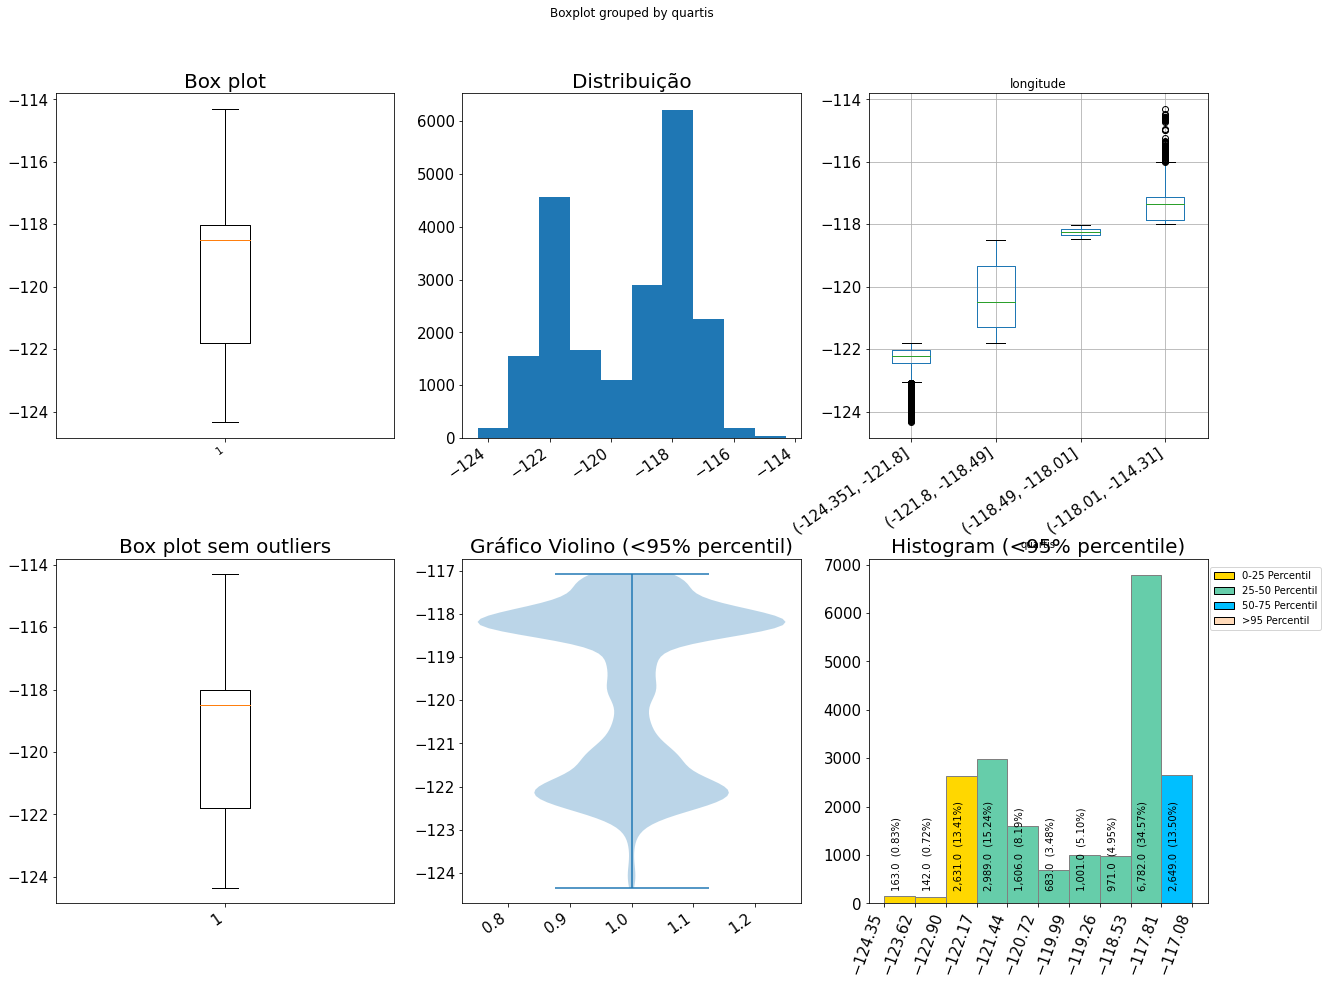

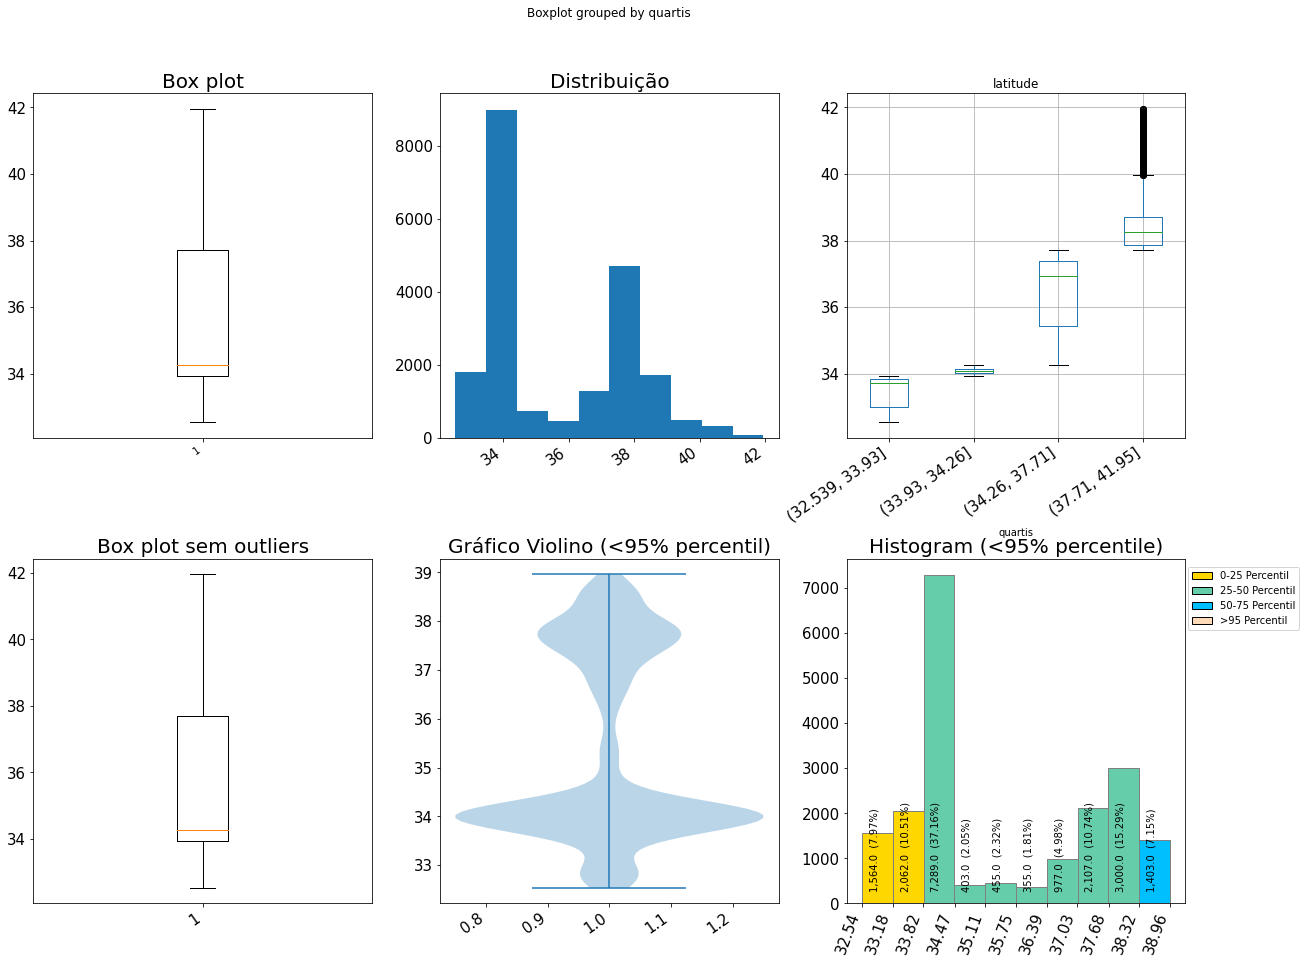

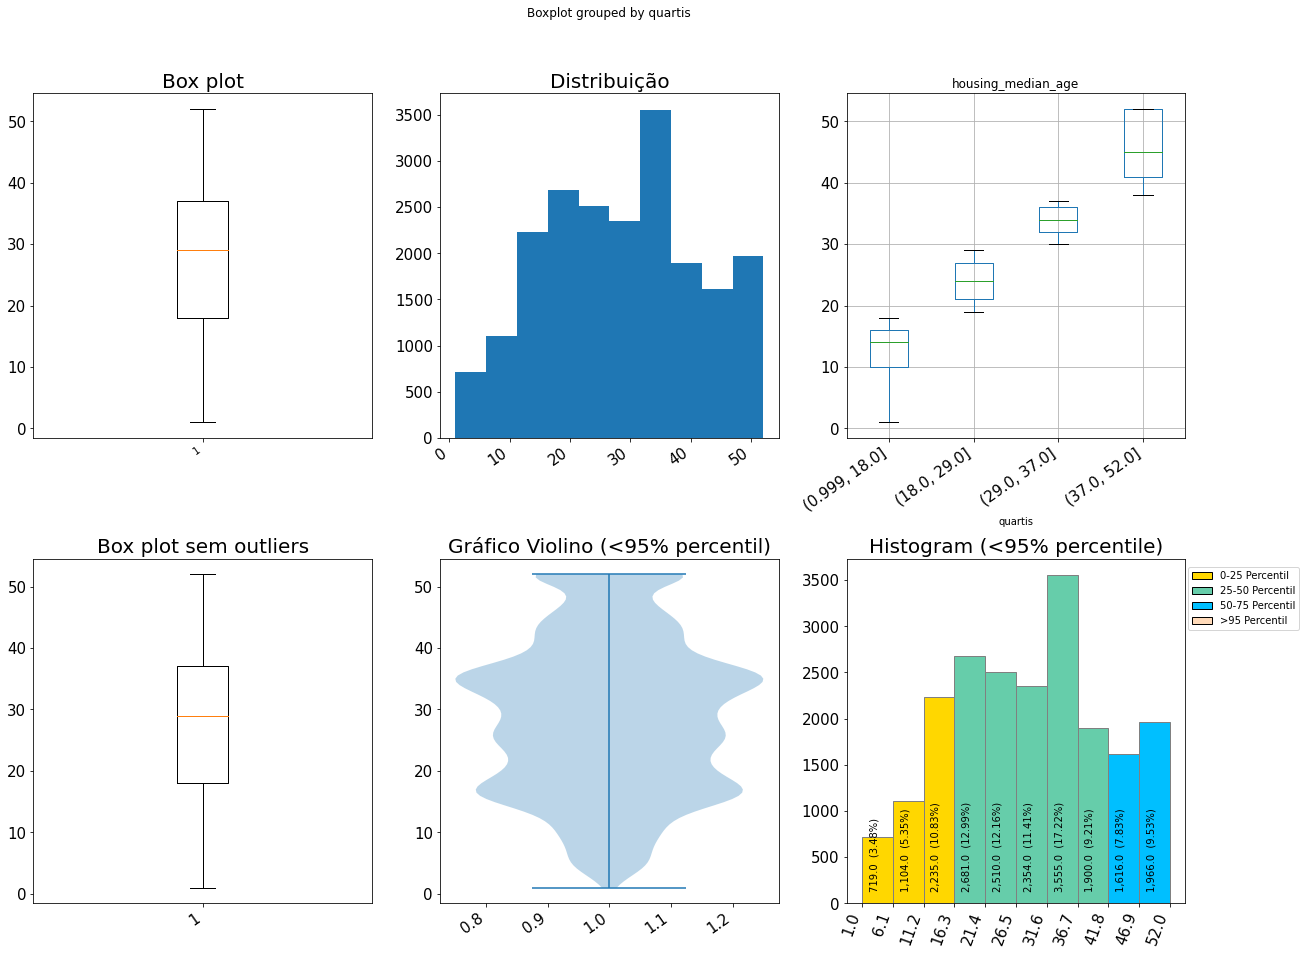

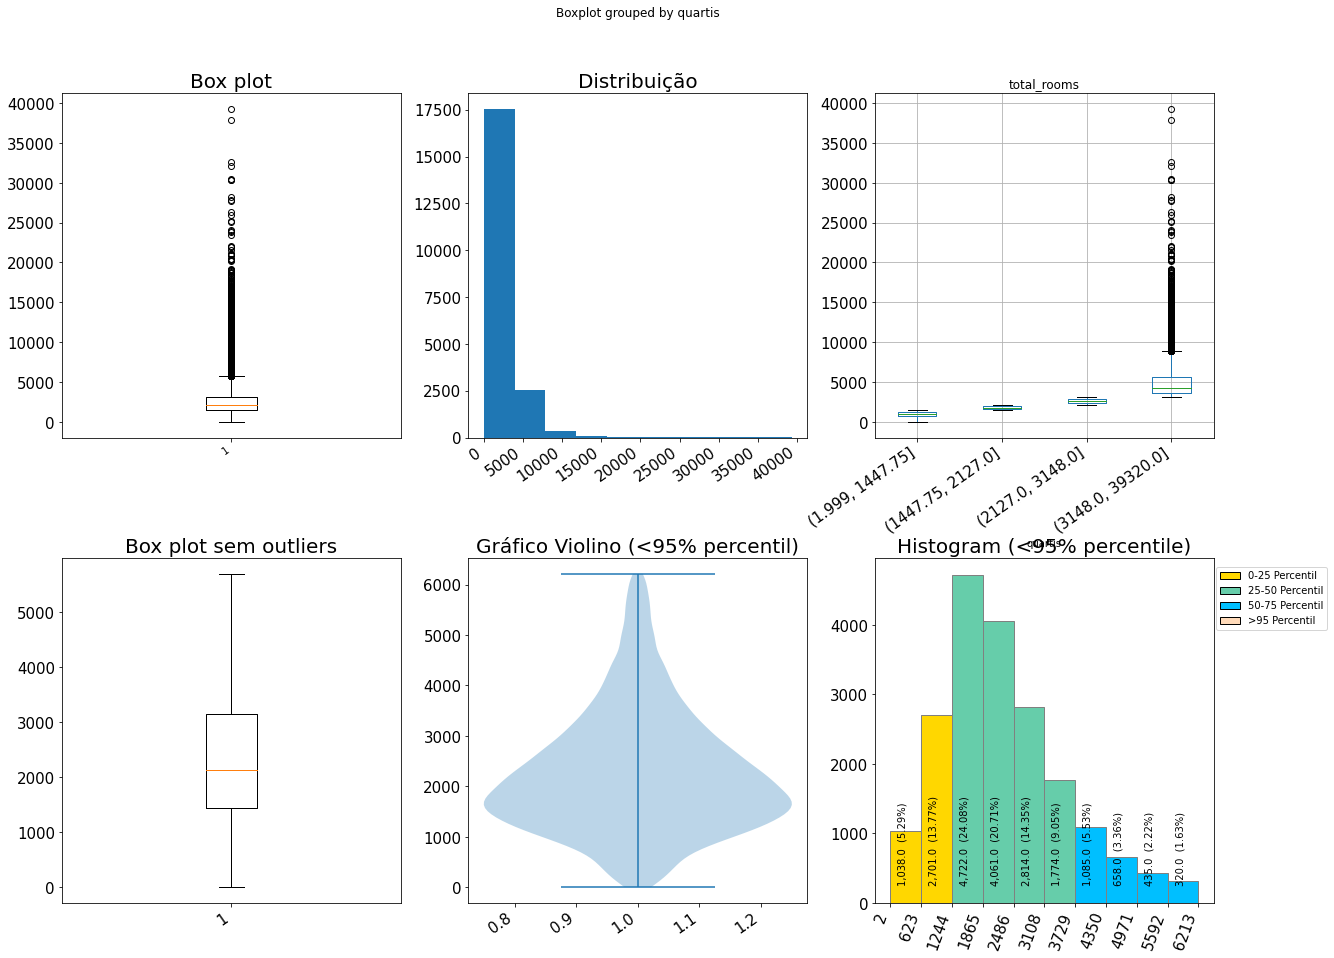

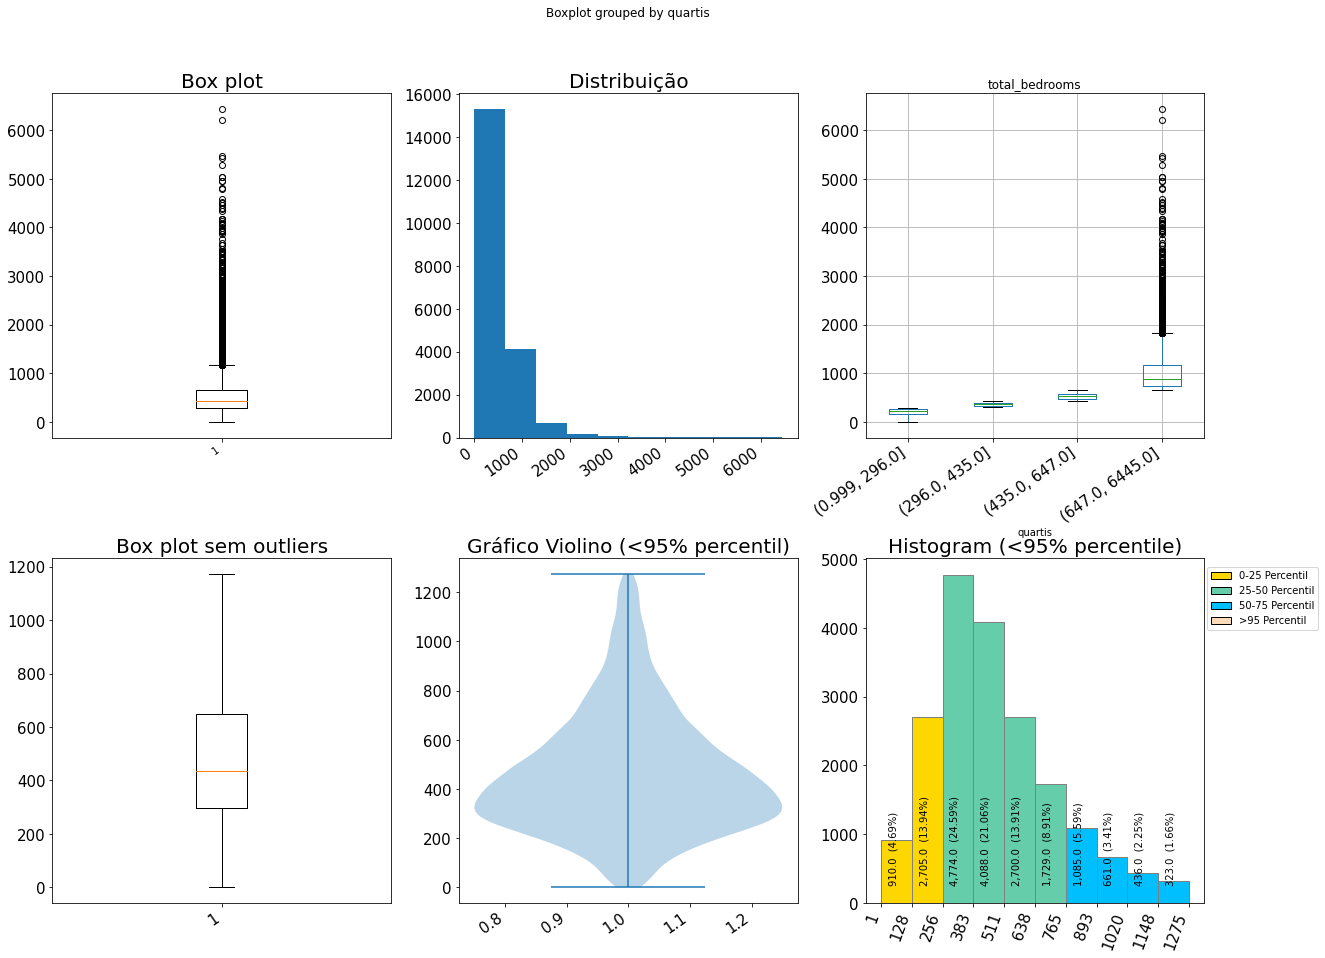

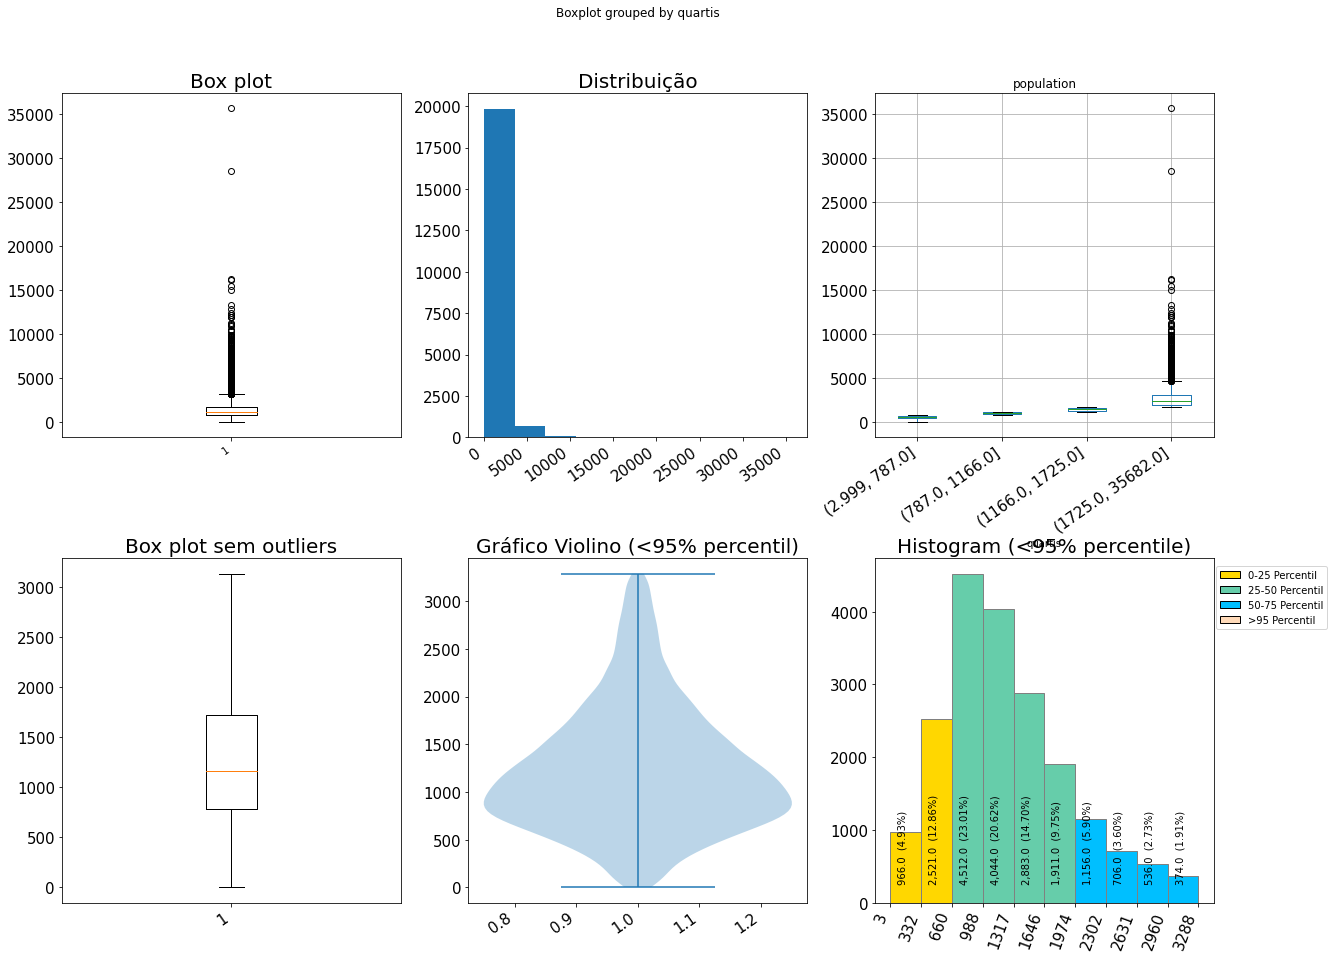

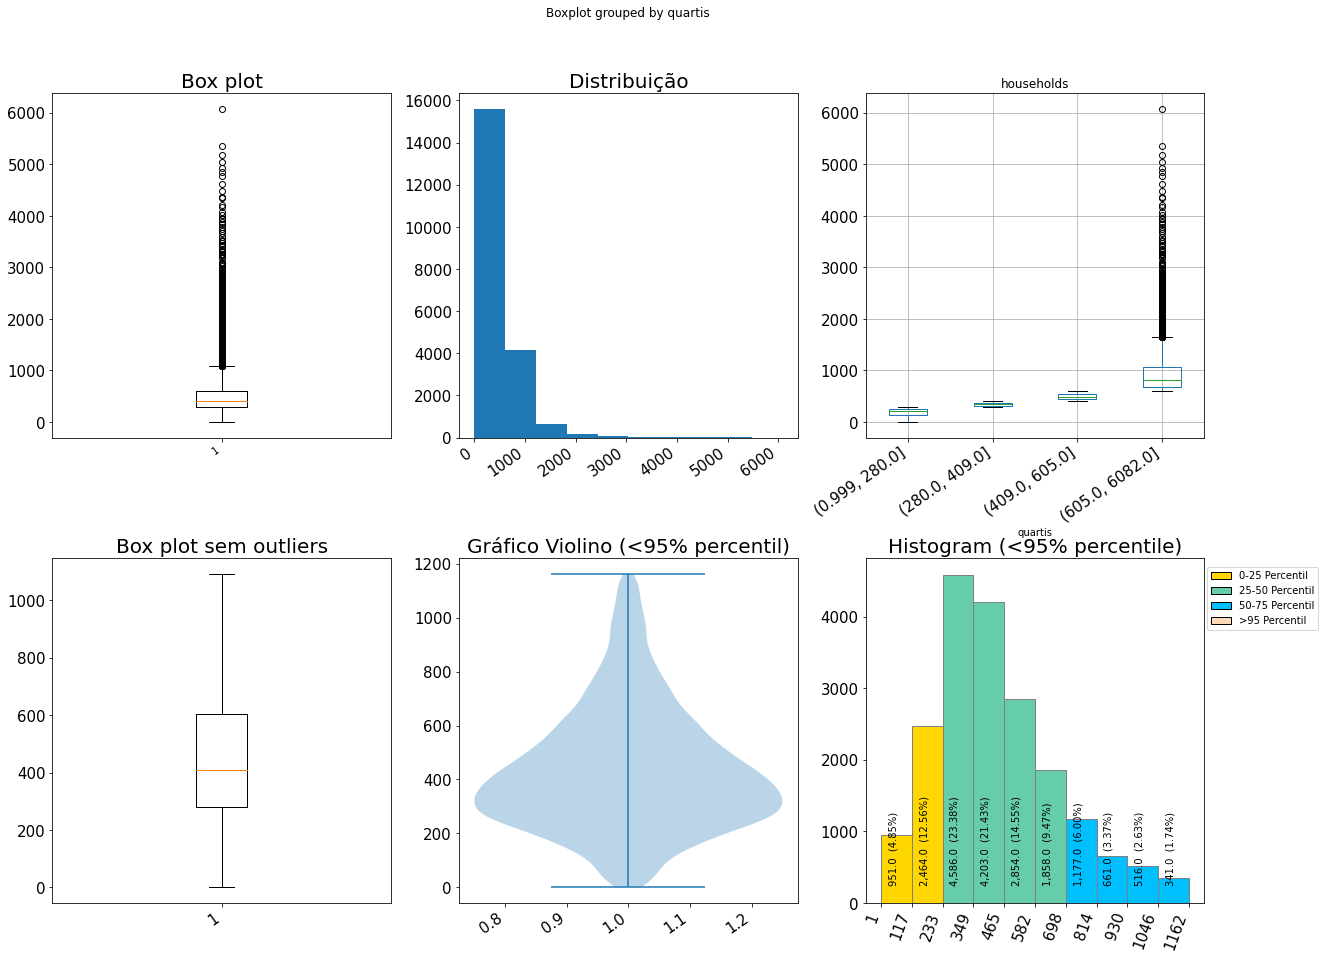

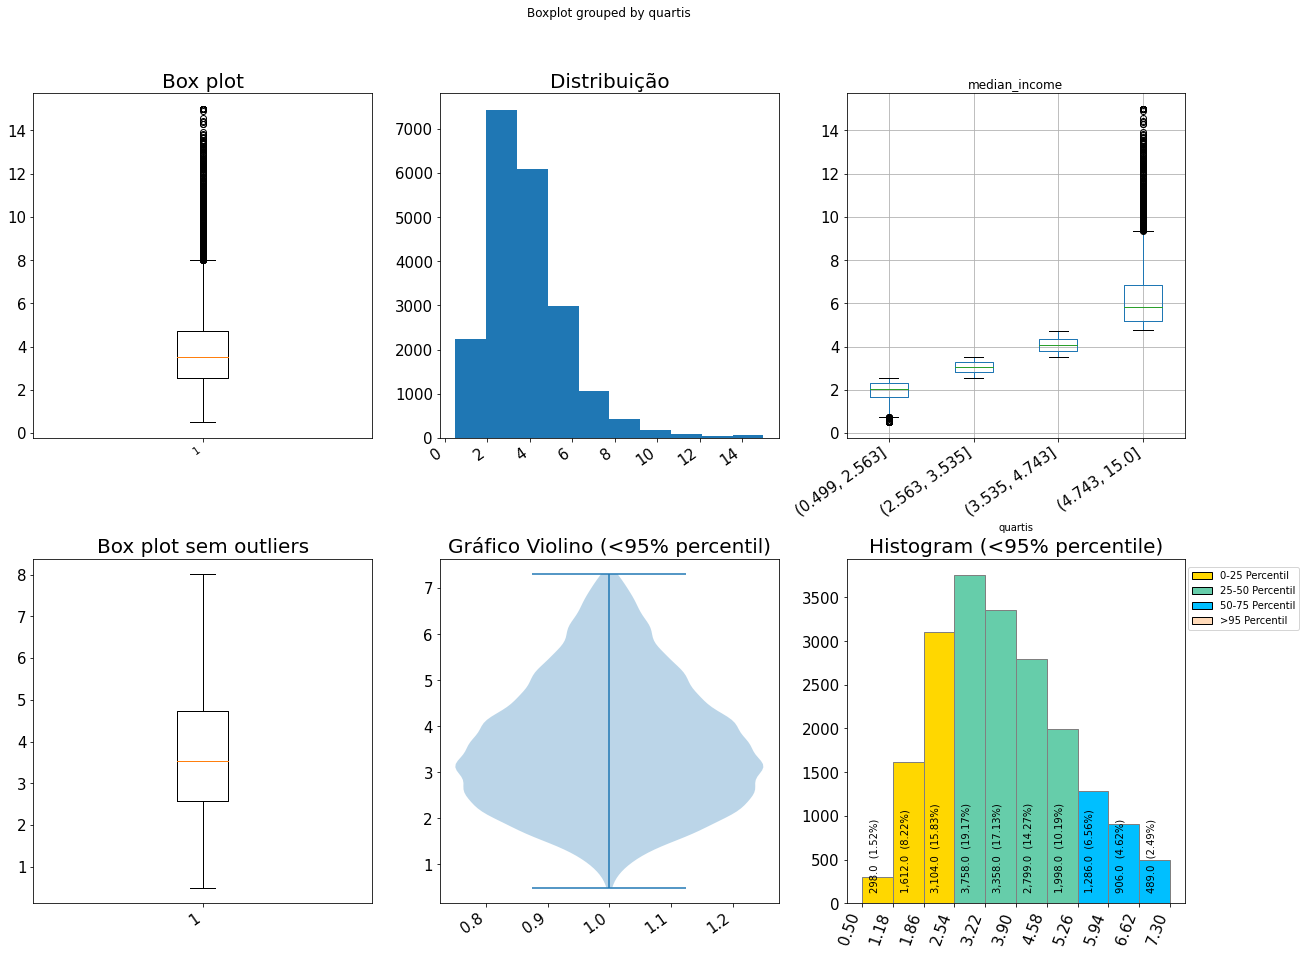

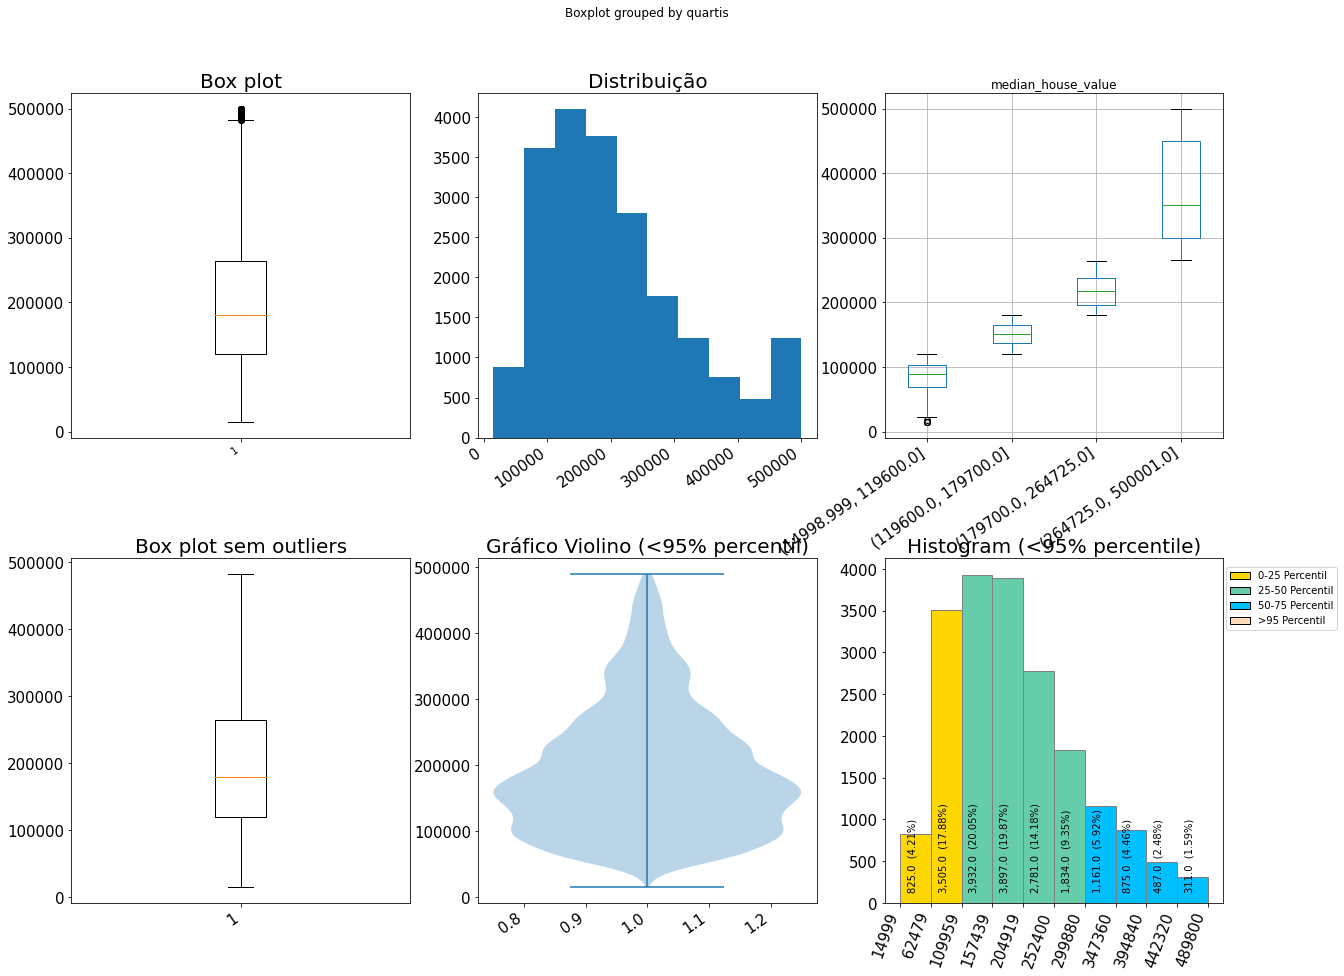

In [18]:
# Loop para cada coluna numérica na lista
for x, col_name in enumerate(num_cols):
    print(x+1, " de ", iter_len, " concluido   ",  col_name)
    # Cria uma cópia dos valores das colunas não nulas ou vazias
    no_null_col = df[col_name].dropna()
    #print(no_null_col)
    # Calcula o percentil 95 dos valores
    q25 = np.percentile(no_null_col, 25)
    q50 = np.percentile(no_null_col, 50)
    q75 = np.percentile(no_null_col, 75)    
    q95 = np.percentile(no_null_col, 95)
    # Plot the graphs
    fig3 = plt.figure(figsize=(20,15))
    fig3.suptitle("Profile da Coluna  " + col_name, fontsize=25)  #Título para a figura
    plt.subplots_adjust(wspace=0.4, hspace=0.35)
    ax1 = fig3.add_subplot(2,3,1)
    #Boxplot
    ax1.set_title("Box plot", fontsize=20)
    plt.setp(ax1.get_xticklabels(), ha="right", rotation=35)
    plt.setp(ax1.get_yticklabels(), ha="right", fontsize=15)
    ax1.boxplot(no_null_col)
    #Distribuição
    ax1 = fig3.add_subplot(2,3,2)
    ax1.set_title("Distribuição", fontsize=20)
    plt.setp(ax1.get_xticklabels(), ha="right", rotation=35, fontsize=15)
    plt.setp(ax1.get_yticklabels(), ha="right", fontsize=15)
    ax1.hist(no_null_col)
    #Boxplot para os quartis
    ax1 = fig3.add_subplot(2,3,3)
    ax1.set_title("Boxplot para quartis", fontsize=20)
    if len(no_null_col.value_counts()) >= 4:
        df[u'quartis'] = pd.qcut(
                        df[col_name],
                        4, duplicates='drop')
        df.boxplot(column= col_name, by=u'quartis', ax = ax1)
    plt.setp(ax1.get_xticklabels(), ha="right", rotation=35, fontsize=15)
    plt.setp(ax1.get_yticklabels(), ha="right", fontsize=15)
    #Boxplot sem outliers
    ax1 = fig3.add_subplot(2,3,4)
    ax1.set_title("Box plot sem outliers", fontsize=20)
    plt.setp(ax1.get_xticklabels(), ha="right", rotation=35, fontsize=15)
    plt.setp(ax1.get_yticklabels(), ha="right", fontsize=15)
    ax1.boxplot(no_null_col, showfliers=False)
    #Grafico de Violino
    ax1 = fig3.add_subplot(2,3,5)
    ax1.set_title("Gráfico Violino (<95% percentil)", fontsize=20)
    plt.setp(ax1.get_xticklabels(), ha="right", rotation=35, fontsize=15)
    plt.setp(ax1.get_yticklabels(), ha="right", fontsize=15)
    ax1.violinplot(no_null_col[no_null_col <= q95])
    #Histograma com faixas, quantidades e percentil
    ax1 = fig3.add_subplot(2,3,6)
    ax1.set_title("Histogram (<95% percentile)", fontsize=20)
    plt.setp(ax1.get_xticklabels(), ha="right", rotation=35, fontsize=15)
    plt.setp(ax1.get_yticklabels(), ha="right", fontsize=15)
    # Pega somente os dados menores que o percentil 95
    data = no_null_col[no_null_col <= q95]
    # Cores para os diferentes percentis
    perc_25_colour = 'gold'
    perc_50_colour = 'mediumaquamarine'
    perc_75_colour = 'deepskyblue'
    perc_95_colour = 'peachpuff'    
    counts, bins, patches = ax1.hist(data, bins=10, facecolor=perc_50_colour, edgecolor='gray')
    ax1.set_xticks(bins.round(2))
    plt.xticks(rotation=70, fontsize=15)
    #Altera a cor das barras
    for patch, leftside, rightside in zip(patches, bins[:-1], bins[1:]):
        if rightside < q25:
            patch.set_facecolor(perc_25_colour)
        elif leftside > q95:
            patch.set_facecolor(perc_95_colour)
        elif leftside > q75:
            patch.set_facecolor(perc_75_colour)
    # Calcula o centro da barra para aprresentar a quantidade de dados e o %
    bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]
    bin_y_centers = ax1.get_yticks()[1] * 0.25    
    # Apresenta a quantidade de dados e o % para cada barra no histograma
    for i in range(len(bins)-1):
        bin_label = "{0:,}".format(counts[i]) + "  ({0:,.2f}%)".format((counts[i]/counts.sum())*100)
        plt.text(bin_x_centers[i], bin_y_centers, bin_label, rotation=90, rotation_mode='anchor')
    #cria a legenda
    handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [perc_25_colour, perc_50_colour, perc_75_colour, perc_95_colour]]
    labels= ["0-25 Percentil","25-50 Percentil", "50-75 Percentil", ">95 Percentil"]
    plt.legend(handles, labels, bbox_to_anchor=(0.5, 0., 0.85, 0.99))    
    
df.drop(u'quartis', axis=1, inplace=True)    

In [19]:
# indntificar as colunas de texto que não estejam vazias
obj_cols = [cols for cols in df.columns if is_string_dtype(df[cols]) and len(df[cols].dropna())>0]
iter_len = len(obj_cols)

In [20]:
obj_cols

['ocean_proximity']

In [21]:
iter_len

1

1  de  1  concluido    ocean_proximity


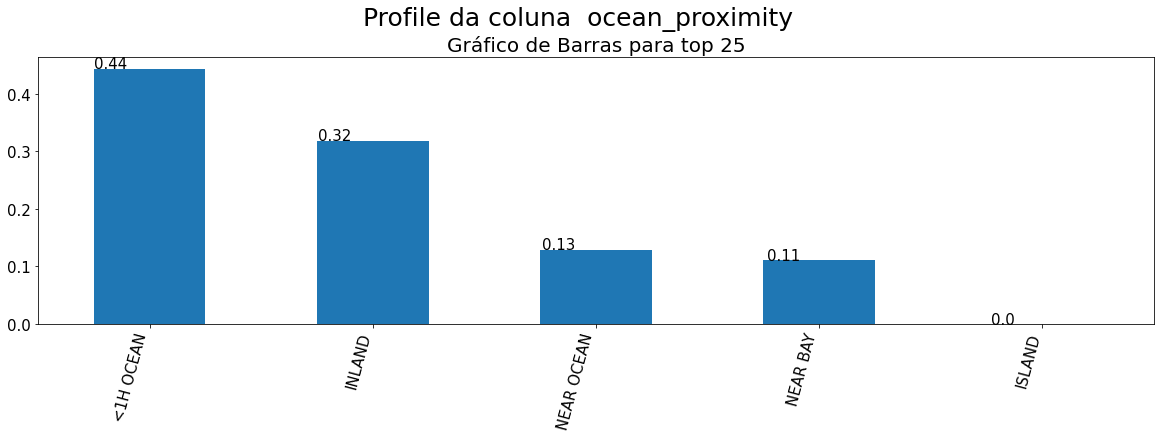

In [22]:
# Para cada coluna tipo objeto/string na lista
for x, col_name in enumerate(obj_cols):
    print(x+1, " de ", iter_len, " concluido   ",  col_name)    
     # Cria uma cópia dos valores das colunas não nulas ou vazias
    no_null_col = df[col_name].dropna()
    values_freq_threshold = 25
    col_unique_count = df[col_name].nunique()    
    # Se o número de valores únicos está abaixo do limite, então armazena os detalhes como valores únicos
    col_unique_vals = df[col_name].value_counts(normalize=True, sort=True)    
    # Constroe os gráficos
    fig4 = plt.figure(figsize=(20,7))
    fig4.suptitle("Profile da coluna  " + col_name, fontsize=25)  #Título para todo o gráfico
    plt.subplots_adjust(wspace=0.4, hspace=0.35, bottom=0.35)
    ax1 = fig4.add_subplot(1,1,1)
    ax1.set_title("Gráfico de Barras para top 25", fontsize=20)
    plt.setp(ax1.get_xticklabels(), ha="right", rotation=45, fontsize=15)
    plt.setp(ax1.get_yticklabels(), ha="right", fontsize=15)    
    col_unique_vals.head(values_freq_threshold).sort_values(ascending=False).plot.bar()
    plt.xticks(rotation=75)
    for p in ax1.patches:
        ax1.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=15)    
    plt.show()
    plt.close('all')